# Task 3 : Handwritten Digit Recognition Using MNIST Dataset

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [6]:
(X_train,y_train),(X_test,y_test) =  keras.datasets.mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

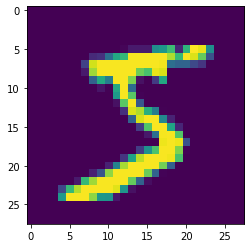

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

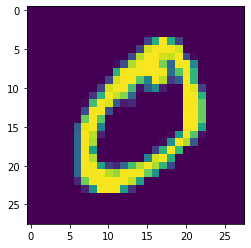

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

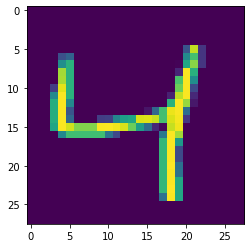

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.1135 - val_accuracy: 0.9762
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.1146 - val_accuracy: 0.9783
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1271 - val_accuracy: 0.9743
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.1271 - val_accuracy: 0.9757
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.1700 - val_accuracy: 0.9690
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.1405 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.1172 - val_accuracy:

In [45]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [46]:
y_pred = y_prob.argmax(axis=1)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

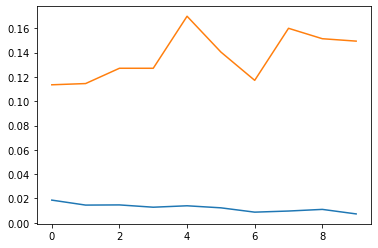

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

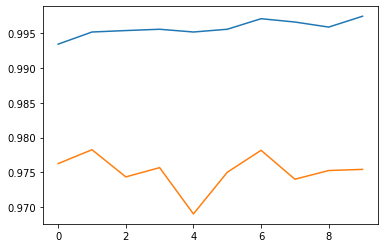

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

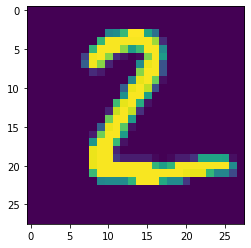

In [55]:
plt.imshow(X_test[1])

In [56]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([2], dtype=int64)